In [8]:
from pulp import *

# Define the problem
problem = LpProblem("CriticalPathMethod", LpMinimize)

# Task durations
durations = {
    "TaskA": 3,
    "TaskB": 2,
    "TaskC": 4,
    "TaskD": 2,
    "TaskE": 3
}

# Dependencies (successors)
dependencies = {
    "TaskA": ["TaskB"],
    "TaskB": ["TaskD"],
    "TaskC": ["TaskD"],
    "TaskD": ["TaskE"],
    "TaskE": []
}

# Variables for start times of each task
start_times = LpVariable.dicts("Start", durations, 0, None, LpInteger)

# The objective is to minimize the end time of the last task
problem += lpSum([start_times[task] + durations[task] for task in durations]), "Minimize Project Duration"

# Constraints
for task in durations:
    for successor in dependencies[task]:
        # Successor cannot start before the task finishes
        problem += start_times[successor] >= start_times[task] + durations[task]

# Solve the problem
problem.solve()

# Results
results = {task: start_times[task].varValue for task in durations}
project_duration = value(problem.objective)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/stephensapol/miniforge3/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5x/8pkqcwt96xvfghxl2rdd1h1r0000gn/T/4672a1c830ac4e678ae5c8b64322445a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/5x/8pkqcwt96xvfghxl2rdd1h1r0000gn/T/4672a1c830ac4e678ae5c8b64322445a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 33 RHS
At line 38 BOUNDS
At line 44 ENDATA
Problem MODEL has 4 rows, 5 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 15 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active

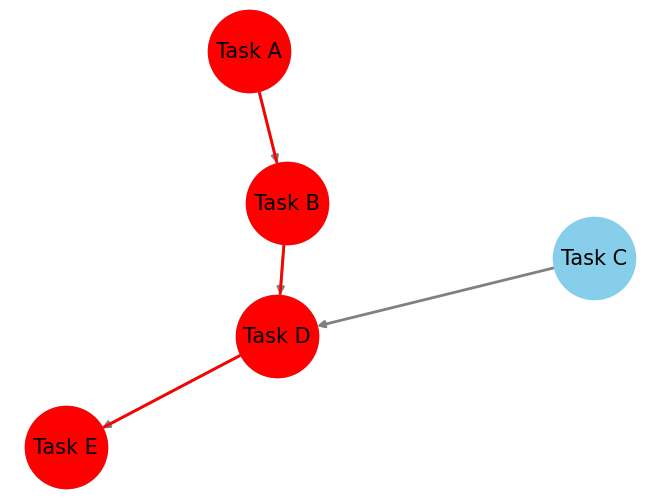

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their durations
G.add_node("Task A", duration=3)
G.add_node("Task B", duration=2)
G.add_node("Task C", duration=4)
G.add_node("Task D", duration=2)
G.add_node("Task E", duration=3)

# Add edges to represent dependencies
G.add_edge("Task A", "Task B")
G.add_edge("Task B", "Task D")
G.add_edge("Task C", "Task D")
G.add_edge("Task D", "Task E")

# Critical path
critical_path = ["Task A", "Task B", "Task D", "Task E"]

# Positions for all nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3500, edge_color='gray', width=2, font_size=15)

# Highlight the critical path
nx.draw_networkx_edges(G, pos, edgelist=[("Task A", "Task B"), ("Task B", "Task D"), ("Task D", "Task E")], edge_color='red', width=2)
nx.draw_networkx_nodes(G, pos, nodelist=critical_path, node_color='red', node_size=3500)

plt.show()
